In [40]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('travel insurance.csv')

In [3]:
print(df.head())

  Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration Destination  Net Sales  Commision (in value) Gender  Age  
0    No       186    MALAYSIA      -29.0                  9.57      F   81  
1    No       186    MALAYSIA      -29.0                  9.57      F   71  
2    No        65   AUSTRALIA      -49.5                 29.70    NaN   32  
3    No        60   AUSTRALIA      -39.6                 23.76    NaN   32  
4    No        79       ITALY      -19.8                 11.88    NaN   41  


In [4]:
print(df.tail())

      Agency Agency Type Distribution Channel Product Name Claim  Duration  \
63321    JZI    Airlines               Online   Basic Plan    No       111   
63322    JZI    Airlines               Online   Basic Plan    No        58   
63323    JZI    Airlines               Online   Basic Plan    No         2   
63324    JZI    Airlines               Online   Basic Plan    No         3   
63325    JZI    Airlines               Online   Basic Plan    No        22   

      Destination  Net Sales  Commision (in value) Gender  Age  
63321       JAPAN       35.0                 12.25      M   31  
63322       CHINA       40.0                 14.00      F   40  
63323    MALAYSIA       18.0                  6.30      M   57  
63324    VIET NAM       18.0                  6.30      M   63  
63325   HONG KONG       26.0                  9.10      F   35  


In [5]:
print(df.shape)

(63326, 11)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  18219 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB
None


In [7]:
print(df.describe())

           Duration     Net Sales  Commision (in value)           Age
count  63326.000000  63326.000000          63326.000000  63326.000000
mean      49.317074     40.702018              9.809992     39.969981
std      101.791566     48.845637             19.804388     14.017010
min       -2.000000   -389.000000              0.000000      0.000000
25%        9.000000     18.000000              0.000000     35.000000
50%       22.000000     26.530000              0.000000     36.000000
75%       53.000000     48.000000             11.550000     43.000000
max     4881.000000    810.000000            283.500000    118.000000


In [8]:
print(df.isnull().sum())

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64


In [9]:
df['Claim'].value_counts()

No     62399
Yes      927
Name: Claim, dtype: int64

In [10]:
df["Gender"].fillna('Not Specified', inplace = True)  

In [11]:
df['Gender'].isnull().sum()

0

In [12]:
df['Net Sales'].astype(int)

0       -29
1       -29
2       -49
3       -39
4       -19
         ..
63321    35
63322    40
63323    18
63324    18
63325    26
Name: Net Sales, Length: 63326, dtype: int32

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  63326 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [14]:
df.loc[df['Duration'] < 0, 'Duration'] = 49.317

In [15]:
df.loc[df['Net Sales'] == 0.0, 'Commision (in value)'] = 0

In [16]:
dfcon = df._get_numeric_data()

In [17]:
dfcon.head()

,Duration,Net Sales,Commision (in value),Age
0,186.0,-29.0,9.57,81
1,186.0,-29.0,9.57,71
2,65.0,-49.5,29.70,32
3,60.0,-39.6,23.76,32
4,79.0,-19.8,11.88,41


In [18]:
dfcat = df.select_dtypes(include='object') 

In [19]:
dfcat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,MALAYSIA,F
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,MALAYSIA,F
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,AUSTRALIA,Not Specified
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,AUSTRALIA,Not Specified
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,ITALY,Not Specified


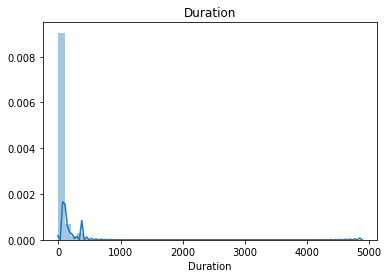

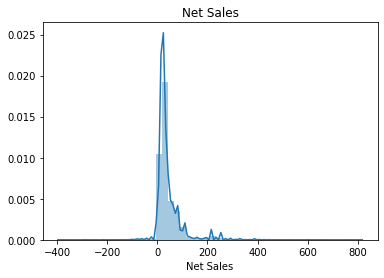

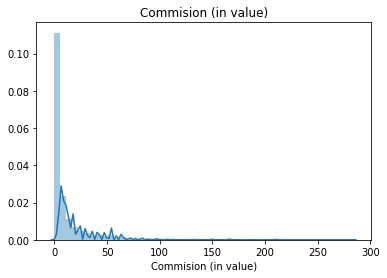

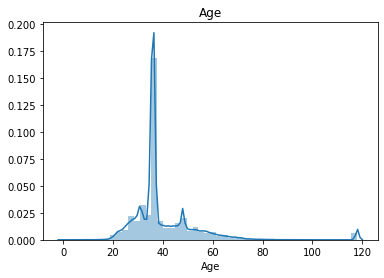

In [20]:
for col in dfcon:
    plt.title(col)
    sns.distplot(df[col])
    plt.show()

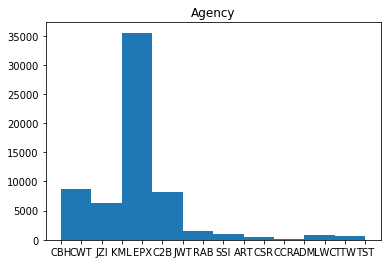

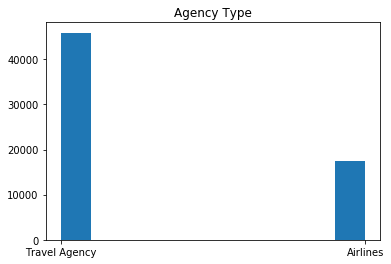

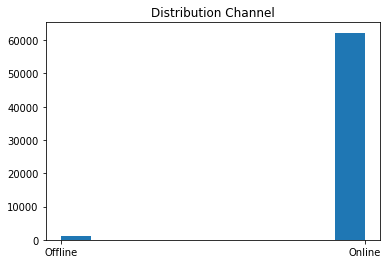

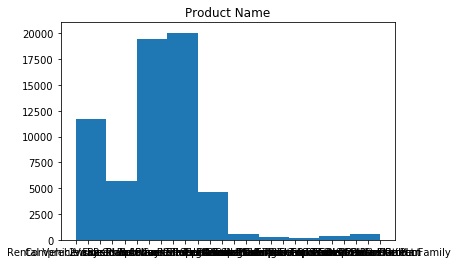

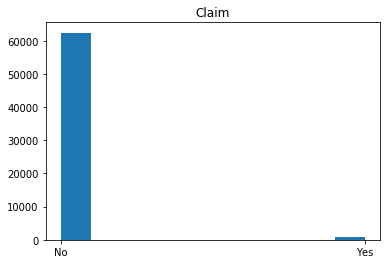

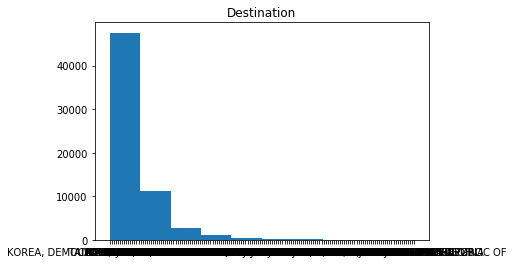

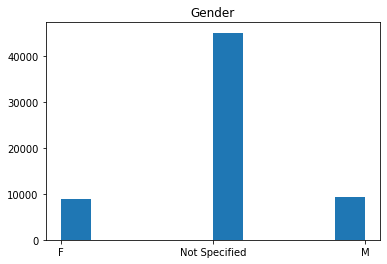

In [21]:
for col in dfcat:
    plt.title(col)
    plt.hist(df[col])
    plt.show()

In [22]:
dfcat = dfcat.drop(['Agency Type','Distribution Channel'],1)

In [23]:
sk = pd.DataFrame({'columns':list(dfcon.columns),'skew':skew(dfcon)})

In [24]:
sk

,columns,skew
0,Duration,23.179636
1,Net Sales,3.272295
2,Commision (in value),4.217167
3,Age,2.987639


In [25]:
le = LabelEncoder()
for feat in dfcat:
    try:
        dfcat[feat] = le.fit_transform(dfcat[feat])
    except:
        print('error',feat)


In [26]:
dfcat.head()

,Agency,Product Name,Claim,Destination,Gender
0,3,12,0,79,0
1,3,12,0,79,0
2,6,16,0,4,2
3,6,16,0,4,2
4,6,16,0,61,2


In [27]:
dfcon.head()

,Duration,Net Sales,Commision (in value),Age
0,186.0,-29.0,9.57,81
1,186.0,-29.0,9.57,71
2,65.0,-49.5,29.70,32
3,60.0,-39.6,23.76,32
4,79.0,-19.8,11.88,41


In [28]:
df_new = pd.concat([dfcat,dfcon],axis=1)

In [29]:
df_new.head()

,Agency,Product Name,Claim,Destination,Gender,Duration,Net Sales,Commision (in value),Age
0,3,12,0,79,0,186.0,-29.0,9.57,81
1,3,12,0,79,0,186.0,-29.0,9.57,71
2,6,16,0,4,2,65.0,-49.5,29.70,32
3,6,16,0,4,2,60.0,-39.6,23.76,32
4,6,16,0,61,2,79.0,-19.8,11.88,41


In [30]:
X = df_new.drop(['Claim'],axis=1)
y = df_new['Claim']

In [31]:
X.head()

,Agency,Product Name,Destination,Gender,Duration,Net Sales,Commision (in value),Age
0,3,12,79,0,186.0,-29.0,9.57,81
1,3,12,79,0,186.0,-29.0,9.57,71
2,6,16,4,2,65.0,-49.5,29.70,32
3,6,16,4,2,60.0,-39.6,23.76,32
4,6,16,61,2,79.0,-19.8,11.88,41


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int32

In [33]:
scaler = StandardScaler()                           #scaler is object
for feature in X:
    X[feature] = scaler.fit_transform(X[[feature]])

In [34]:
X.head()

,Agency,Product Name,Destination,Gender,Duration,Net Sales,Commision (in value),Age
0,-1.540945,0.407699,-0.148881,-2.169863,1.342757,-1.426997,0.017759,2.927182
1,-1.540945,0.407699,-0.148881,-2.169863,1.342757,-1.426997,0.017759,2.213758
2,-0.276117,1.009919,-1.933257,0.590430,0.154033,-1.846690,1.055942,-0.568598
3,-0.276117,1.009919,-1.933257,0.590430,0.104912,-1.644009,0.749593,-0.568598
4,-0.276117,1.009919,-0.577131,0.590430,0.291571,-1.238647,0.136894,0.073484


In [35]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.2,random_state=42)

In [36]:
logreg = LogisticRegression()

In [37]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = logreg.predict(X_val)

In [39]:
acc = accuracy_score(y_val,y_pred)
print('acc is {}'.format(accuracy_score(y_val,y_pred)))

acc is 0.9857887257224064
